# K-Means Tutorial

Load the modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

### Load the data
from kmeans.csv

In [9]:
f = open("kmeans.csv")
data = np.loadtxt(f, delimiter='\t')
print(data)

[[ 67.9487  34.5513]
 [ 33.3333  37.6282]
 [ 63.0769  49.9359]
 [ 29.7436  26.859 ]
 [ 68.9744  44.5513]
 [ 54.359   24.5513]
 [ 47.4359  80.7051]
 [ 42.8205  27.2436]
 [ 46.1538  15.7051]
 [ 66.4103  41.4744]
 [ 45.3846  76.4744]
 [ 33.8462  30.7051]
 [ 41.5385  31.4744]
 [ 33.5897  43.0128]
 [ 11.0256  40.3205]
 [ 17.9487  35.3205]
 [ 46.9231  94.5513]
 [ 63.5897   0.7051]
 [ 93.5897  44.5513]
 [ 29.4872  21.4744]
 [ 46.9231  43.0128]
 [ 64.6154  92.2436]
 [ 12.5641  29.1667]
 [ 29.4872  37.2436]
 [ 30.2564  51.4744]
 [ 62.0513  53.0128]
 [ 18.2051  11.859 ]
 [ 52.5641  49.9359]
 [ 32.0513  26.859 ]
 [ 34.1026  15.3205]
 [ 82.8205  48.3974]
 [ 22.3077  35.7051]
 [ 47.9487  87.6282]
 [ 79.2308  25.3205]
 [ 20.2564  26.4744]
 [ 66.1538  69.1667]
 [ 43.3333  79.5513]
 [ 72.5641  33.0128]
 [ 32.3077  34.1667]
 [ 22.0513  31.0897]
 [ 75.1282  30.7051]
 [ 59.2308  94.1667]
 [ 70.      59.9359]
 [ 83.5897  98.7821]
 [ 23.0769  24.9359]
 [ 72.0513  39.5513]
 [ 50.2564  77.6282]
 [ 90.5128  1

In [3]:
data.shape

(150, 2)

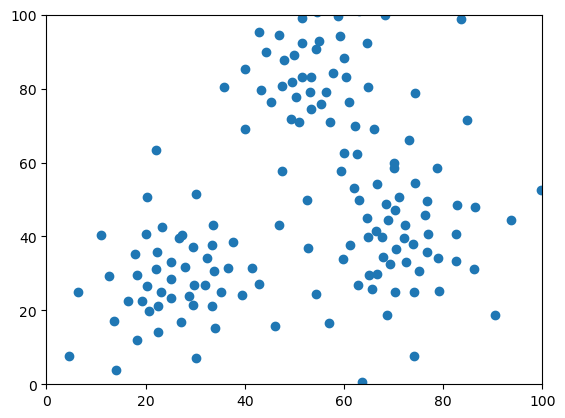

In [4]:
plt.scatter(data[:,0], data[:,1])
plt.axis([0, 100, 0, 100])
plt.show()

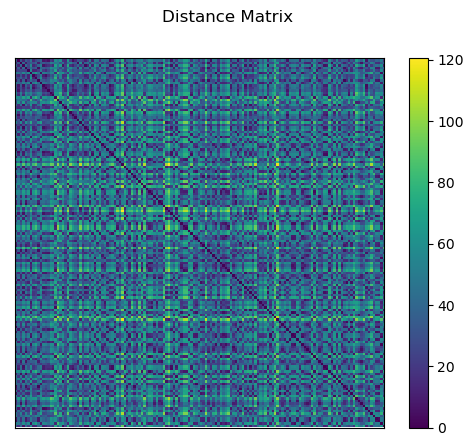

In [28]:
euclidean_dists = metrics.euclidean_distances(data)

def plot_distance_matrix(D):
    fig, ax = plt.subplots()
    image = ax.matshow(D)
    fig.colorbar(image)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.suptitle('Distance Matrix')
    
plot_distance_matrix(euclidean_dists)

Create the K-Means Model

In [21]:
model = KMeans(n_clusters=3)

Fit the model

In [22]:
model.fit(data)

KMeans(n_clusters=3)

Predict the cluster of each element

In [23]:
clusters = model.predict(data)

Display the clusters

In [24]:
clusters

array([0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2,
       0, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2,
       1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2])

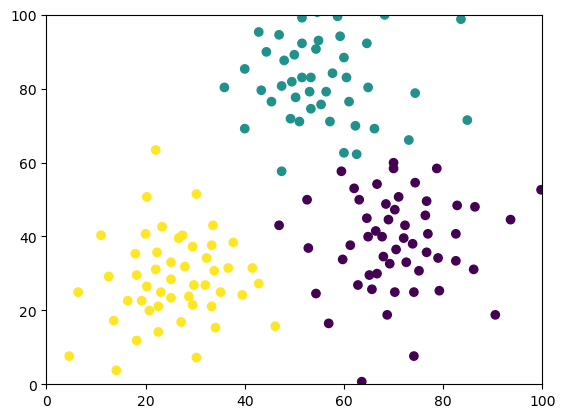

In [25]:
plt.scatter(data[:,0], data[:,1], c=clusters)
plt.axis([0, 100, 0, 100])
plt.show()

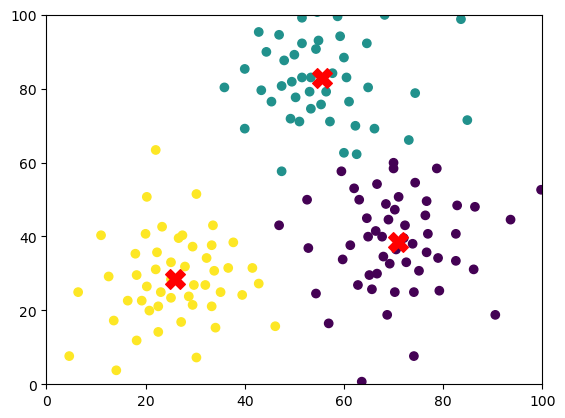

In [26]:
plt.scatter(data[:,0], data[:,1],  c=clusters)

centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x, centroids_y, marker='X', s=200, c='r')

plt.axis([0, 100, 0, 100])
plt.show()

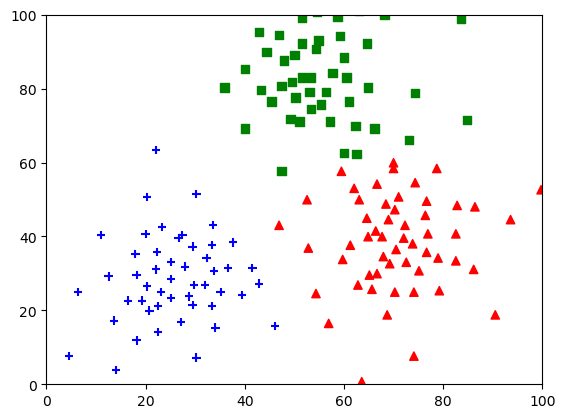

In [27]:
markers = '^s+'
colors = 'rgb'
for i, m in enumerate(markers):
    points = (clusters == i)
    c = [colors[l] for l in clusters[points]]
    plt.scatter(data[points,0], data[points,1], c=c, marker=m)
plt.axis([0, 100, 0, 100])

plt.show()

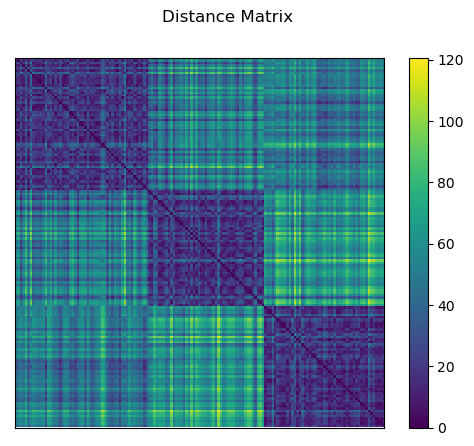

In [29]:
idx = np.argsort(clusters)

rearranged_dists = euclidean_dists[idx,:][:,idx]

plot_distance_matrix(rearranged_dists)

This matrix shows how 
- intra-class distance is low
- inter-class distance is high

In [30]:
data2 = data[idx]
idx

array([  0,  40,  42,  45,  47,  48,  50,  56,  58,  59, 123,  64, 122,
        66,  70, 128,  75,  78,  82, 119,  89, 118,  91,  94,  96,  98,
       114, 104, 107, 108, 109,  76,  37, 111, 139, 138,  18,  25, 134,
        27, 136, 133,  20, 143,  17,   4,  30, 140,  33, 146,   2, 147,
         5,   9,  84,  81, 141,  80,  83,  85, 130,  88,  10,  77, 117,
       116,   6,  99, 100, 101, 103, 105, 113,  86,  92,  72, 148,  35,
        36,  32,  41, 132,  43, 127,  46,  49,  51,  16,  54, 112,  53,
        57,  73, 121,  69,  68,  67, 124,  21,  60,  55, 125, 115, 135,
       145, 126, 144, 131, 129, 120, 142, 137,  74, 106,  28,  26,  24,
        23,  22,  19,  15,  14,  13,  12,  11,   8,   7,   3,   1,  29,
       110,  31,  38, 102,  97,  95,  93,  90,  87,  79,  71,  65,  63,
        62,  61,  52,  44,  39,  34, 149], dtype=int64)

In [31]:
clusters2 = model.predict(data2)
clusters2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
print(centroids_x)
print(centroids_y)

[70.83571296 55.62465532 25.83987347]
[38.36182407 82.85734043 28.56227347]


In [34]:
model.predict([[60,80]])

array([1])